In [1]:
# install the relevant packages
import requests
import pandas as pd
from mplsoccer import Pitch
import matplotlib.pyplot as plt
import json
import os
from matplotlib.colors import LinearSegmentedColormap

In [2]:
# Scrape all of the shot data from a given fixture from SofaScore
url = 'https://www.sofascore.com/football/match/arsenal-chelsea/NR#id:12436890'

# the id for the match is listed at the end of the URL
match_id = url.split('id:')[-1]

match_id

'12436890'

In [3]:
# We can extract the team names from the URL

url_team_names = url.split('/')[5]

url_team_names

'arsenal-chelsea'

In [4]:
# We can define our Home & Away Team names

home_team_name = url_team_names.split('-')[0].capitalize()
away_team_name = url_team_names.split('-')[-1].capitalize()

print(f'{home_team_name} vs {away_team_name}')

Arsenal vs Chelsea


In [5]:
# execute a curl command to get the shot data - will need to sub in the match_id
response = json.loads(os.popen(
  f'curl -H "Host: api.sofascore.com" -H "Accept: */*" -H "User-Agent: curl/8.1.2" https://api.sofascore.com/api/v1/event/{match_id}/shotmap').read())['shotmap']

In [6]:
# turn this data into a df

df = pd.DataFrame(response)

df.columns

df.head()

,player,isHome,shotType,situation,playerCoordinates,bodyPart,goalMouthLocation,goalMouthCoordinates,xg,xgot,id,time,addedTime,timeSeconds,draw,reversedPeriodTime,reversedPeriodTimeSeconds,incidentType,blockCoordinates,goalType
0,"{'name': 'Leandro Trossard', 'firstName': '', ...",False,miss,assisted,"{'x': 7, 'y': 44.5, 'z': 0}",right-foot,right,"{'x': 0, 'y': 30.9, 'z': 4.2}",0.437369,0.000000,4037704,90,6.0,5712,"{'start': {'x': 44.5, 'y': 7}, 'end': {'x': 69...",1,588,shot,NaN,NaN
1,"{'name': 'Martin Ødegaard', 'firstName': '', '...",False,miss,assisted,"{'x': 19.5, 'y': 38.5, 'z': 0}",left-foot,right,"{'x': 0, 'y': 37.5, 'z': 4.2}",0.057820,0.000000,4037552,87,NaN,5187,"{'start': {'x': 38.5, 'y': 19.5}, 'block': {'x...",4,213,shot,"{'x': 9.6, 'y': 48.6, 'z': 0}",NaN
2,"{'name': 'Nicolas Jackson', 'firstName': 'Nico...",True,save,regular,"{'x': 8.5, 'y': 58.7, 'z': 0}",head,low-centre,"{'x': 0, 'y': 51.3, 'z': 12.7}",0.055022,0.066752,4037523,83,NaN,4970,"{'start': {'x': 58.7, 'y': 8.5}, 'block': {'x'...",8,430,shot,"{'x': 3.6, 'y': 53.2, 'z': 0}",NaN
3,"{'name': 'Leandro Trossard', 'firstName': '', ...",False,block,assisted,"{'x': 11.8, 'y': 32.9, 'z': 0}",right-foot,low-centre,"{'x': 0, 'y': 49.7, 'z': 12.5}",0.027860,0.000000,4037506,79,NaN,4700,"{'start': {'x': 32.9, 'y': 11.8}, 'block': {'x...",12,700,shot,"{'x': 10.3, 'y': 34.3, 'z': 0}",NaN
4,"{'name': 'Pedro Neto', 'slug': 'pedro-neto', '...",True,block,assisted,"{'x': 20.9, 'y': 64.6, 'z': 0}",left-foot,low-centre,"{'x': 0, 'y': 51.1, 'z': 19}",0.017867,0.000000,4037488,77,NaN,4583,"{'start': {'x': 64.6, 'y': 20.9}, 'block': {'x...",14,817,shot,"{'x': 18.6, 'y': 63.2, 'z': 0}",NaN


In [7]:
# Extract the x & y values from the shot coordinates & create indipendant columns for each
df['x'] = df['playerCoordinates'].apply(lambda coord: coord['x'])
df['y'] = df['playerCoordinates'].apply(lambda coord: coord['y'])

# Extract player names from the nested dictionary
df['player_name'] = df['player'].apply(lambda x: x['name'] if isinstance(x, dict) and 'name' in x else None)

df.head()

,player,isHome,shotType,situation,playerCoordinates,bodyPart,goalMouthLocation,goalMouthCoordinates,xg,xgot,...,timeSeconds,draw,reversedPeriodTime,reversedPeriodTimeSeconds,incidentType,blockCoordinates,goalType,x,y,player_name
0,"{'name': 'Leandro Trossard', 'firstName': '', ...",False,miss,assisted,"{'x': 7, 'y': 44.5, 'z': 0}",right-foot,right,"{'x': 0, 'y': 30.9, 'z': 4.2}",0.437369,0.000000,...,5712,"{'start': {'x': 44.5, 'y': 7}, 'end': {'x': 69...",1,588,shot,NaN,NaN,7.0,44.5,Leandro Trossard
1,"{'name': 'Martin Ødegaard', 'firstName': '', '...",False,miss,assisted,"{'x': 19.5, 'y': 38.5, 'z': 0}",left-foot,right,"{'x': 0, 'y': 37.5, 'z': 4.2}",0.057820,0.000000,...,5187,"{'start': {'x': 38.5, 'y': 19.5}, 'block': {'x...",4,213,shot,"{'x': 9.6, 'y': 48.6, 'z': 0}",NaN,19.5,38.5,Martin Ødegaard
2,"{'name': 'Nicolas Jackson', 'firstName': 'Nico...",True,save,regular,"{'x': 8.5, 'y': 58.7, 'z': 0}",head,low-centre,"{'x': 0, 'y': 51.3, 'z': 12.7}",0.055022,0.066752,...,4970,"{'start': {'x': 58.7, 'y': 8.5}, 'block': {'x'...",8,430,shot,"{'x': 3.6, 'y': 53.2, 'z': 0}",NaN,8.5,58.7,Nicolas Jackson
3,"{'name': 'Leandro Trossard', 'firstName': '', ...",False,block,assisted,"{'x': 11.8, 'y': 32.9, 'z': 0}",right-foot,low-centre,"{'x': 0, 'y': 49.7, 'z': 12.5}",0.027860,0.000000,...,4700,"{'start': {'x': 32.9, 'y': 11.8}, 'block': {'x...",12,700,shot,"{'x': 10.3, 'y': 34.3, 'z': 0}",NaN,11.8,32.9,Leandro Trossard
4,"{'name': 'Pedro Neto', 'slug': 'pedro-neto', '...",True,block,assisted,"{'x': 20.9, 'y': 64.6, 'z': 0}",left-foot,low-centre,"{'x': 0, 'y': 51.1, 'z': 19}",0.017867,0.000000,...,4583,"{'start': {'x': 64.6, 'y': 20.9}, 'block': {'x...",14,817,shot,"{'x': 18.6, 'y': 63.2, 'z': 0}",NaN,20.9,64.6,Pedro Neto


In [8]:
# We'll need to adjust these coordinates from the sofascore pitch size to the statsbomb pitch size to plot them acurately on our pitch

# Sofascore uses pitch size 100X100
# Statsbomb uses pitch size 120X80

sofascore_max_x = 100

sofascore_max_y = 100

# Scale the x-values from 0-100 (sofascore map) to 0-120 (sb map)

df['x_scaled'] = (df['x'] / sofascore_max_x) * 120

# Scale the y-values from 0-100 (sofascore map) to 0-80 (sb map)

df['y_scaled'] = (df['y'] / sofascore_max_y) * 80

In [9]:
# Separate home and away data for seperate plotting
home_data = df[df['isHome']]
away_data = df[~df['isHome']]

In [10]:
# Invert the x coordinates for away team data to show plots on the right side of the pitch
away_data['x_scaled'] = 120 - away_data['x_scaled']

C:\Users\jmaher\AppData\Local\Temp\ipykernel_18224\192929809.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  away_data['x_scaled'] = 120 - away_data['x_scaled']


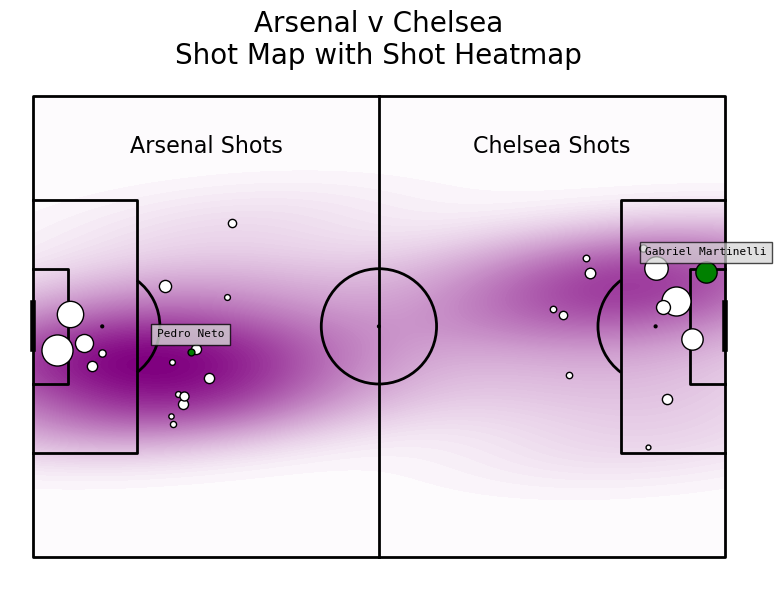

In [11]:
from mplsoccer import Pitch
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Initialize the pitch (using a standard StatsBomb layout)
pitch = Pitch(pitch_type='statsbomb', pitch_color='white', line_color='black', line_zorder=2)

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))  # One figure, one axis

# Combine home and away team shots for the heatmap data
all_shots = pd.concat([home_data, away_data])

# Define the custom colormap (white to light purple)
cmap = LinearSegmentedColormap.from_list('custom_cmap', ['white', 'purple'])

# Plot heatmap (with lower zorder to keep it behind the pitch lines)
kde = pitch.kdeplot(
    all_shots['x_scaled'],  # x-coordinates of all shots, away team data is still inverted on the pitch
    all_shots['y_scaled'],  # y-coordinates of all shots
    ax=ax,
    fill=True, # cover the whole pitch
    cmap=cmap,  # Custom colormap
    n_levels=100,  # Smooth heatmap
    thresh=0,  # Include low-density areas
    zorder=1  # Draw heatmap beneath pitch lines
)

# Redraw the pitch lines (with higher zorder so they are above the heatmap)
pitch.draw(ax=ax)

# Plot home team shots
for index, shot in home_data.iterrows():
    x_coord = shot['x_scaled']
    y_coord = shot['y_scaled']
    color = 'green' if shot['shotType'] == 'goal' else 'white'
    zorder = 3 if shot['shotType'] == 'goal' else 2  # Keep above heatmap
    ax.scatter(x=x_coord, y=y_coord, s=1000 * shot['xg'], ec='black', c=color, zorder=zorder)

    # Add a label to the goals for the player who scored
    if shot['shotType'] == 'goal':  # Only label goals
        ax.text(
            x_coord,  # x-coordinate of the text
            y_coord - 3,  # y-coordinate of the text
            shot['player_name'],  # Text to display
            ha='center', 
            va='center', 
            fontfamily='monospace', 
            fontsize=8,
            zorder=10,
            bbox=dict(facecolor='lightgray', edgecolor='black', alpha=0.8)  # Add background with opacity
        )

# Plot away team shots
for index, shot in away_data.iterrows():
    x_coord = shot['x_scaled']
    y_coord = shot['y_scaled']
    color = 'green' if shot['shotType'] == 'goal' else 'white'
    zorder = 3 if shot['shotType'] == 'goal' else 2  # Keep above heatmap
    ax.scatter(x=x_coord, y=y_coord, s=1000 * shot['xg'], ec='black', c=color, zorder=zorder)

    # Add a label to the goals for the player who scored
    if shot['shotType'] == 'goal':  # Only label goals
        ax.text(
            x_coord,  # x-coordinate of the text
            y_coord - 3.5,  # y-coordinate of the text
            shot['player_name'],  # Text to display
            ha='center', 
            va='center', 
            fontfamily='monospace', 
            fontsize=8,
            zorder=10,
            bbox=dict(facecolor='lightgray', edgecolor='black', alpha=0.7)  # Add background with opacity
        )

# Add a Title
ax.set_title(f"{home_team_name} v {away_team_name}\nShot Map with Shot Heatmap", fontsize=20, y=1)

# Add the Team names
ax.text(30, 10, f'{home_team_name} Shots', ha='center', fontsize=16)
ax.text(90, 10, f'{away_team_name} Shots', ha='center', fontsize=16)

# Display
plt.tight_layout()
plt.show()


df.columns

In [ ]:
df.columns